In [144]:
import pandas as pd
import numpy as np

## Series类型
Series是带索引的一维数组

In [3]:
# 自动索引
pd.Series([4, 5, 6])

0    4
1    5
2    6
dtype: int64

In [4]:
# 自定义索引
pd.Series([4, 5, 6], index=['a', 'b', 'c'])

a    4
b    5
c    6
dtype: int64

#### Series的五种创建方式
结果都是按index顺序展示

In [21]:
# (1)列表，如上, 元素个数与index元素个数保持一致

# (2)标量值，index的个数决定了Series的尺寸
pd.Series(9, index=['a', 'b', 'c'])

a    9
b    9
c    9
dtype: int64

In [19]:
# (3)字典，键作为索引，index只反应元素个数（可以！=键值对个数），对应关系由键值对声明
pd.Series({'a':1, 'b':2 , 'c':3}, index=['d','c','b','a'])

d    NaN
c    3.0
b    2.0
a    1.0
dtype: float64

In [15]:
# (4)ndarray
pd.Series(np.arange(5),index=['a','b','c','d','e'])

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [17]:
# (5) 其他函数，如range
pd.Series(range(5),index=['a','b','c','d','e'])

a    0
b    1
c    2
d    3
e    4
dtype: int64

## Series的基本操作
Series的两个重要属性index和values

In [45]:
s = pd.Series([9,8,7,6], ['a','b','c','d'])
s.index, s.values 

(Index(['a', 'b', 'c', 'd'], dtype='object'), array([9, 8, 7, 6], dtype=int64))

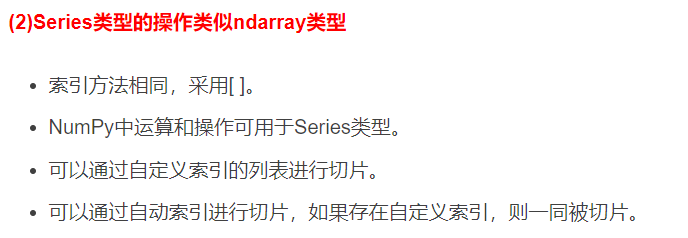

In [34]:
s[-2]

7

In [35]:
s[:3]

a    9
b    8
c    7
dtype: int64

In [36]:
s[s>s.median()] # 打印超过均值的元素

a    9
b    8
dtype: int64

In [43]:
s[[True,True,False,False]]

a    9
b    8
dtype: int64

In [44]:
np.exp(s)

a    8103.083928
b    2980.957987
c    1096.633158
d     403.428793
dtype: float64

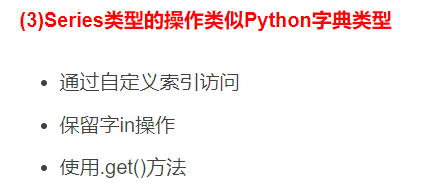

In [46]:
s['b']

8

判断某个值是否是Series的索引

In [57]:
9 in s, 'a' in s

(False, True)

In [65]:
s.get('e', 100) # 若没有'e'返回默认值100

100

## Series的对齐操作

In [66]:
a = pd.Series([1,2,3], ['c','d','e'])
b = pd.Series([9,8,7,6], ['a','b','c','d'])
a + b # Series类型是根据索引运算的，如果有一个没有该索引，则运算为空

a    NaN
b    NaN
c    8.0
d    8.0
e    NaN
dtype: float64

## Series的name属性
Series对象及其索引对象都可以有一个名字，存储在属性.name中。

In [71]:
b = pd.Series([9,8,7,6], ['a','b','c','d'])
b.name, b.index.name = 'Series对象', '索引列'
b.name, b.index.name

('Series对象', '索引列')

In [72]:
b

索引列
a    9
b    8
c    7
d    6
Name: Series对象, dtype: int64

## Series类型的修改

In [73]:
b = pd.Series([9,8,7,6], ['a','b','c','d'])
b['a'] = 15
b

a    15
b     8
c     7
d     6
dtype: int64

In [74]:
b['b','c'] = 20
b

a    15
b    20
c    20
d     6
dtype: int64

## DataFrame类型
DataFrame是行列索引的二维数组（其每列就是一个Series）
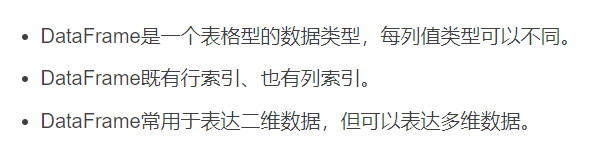

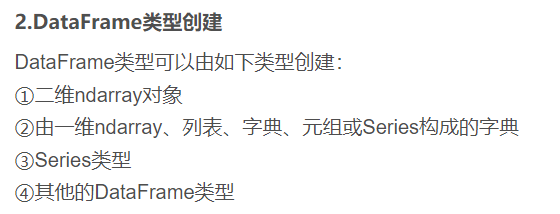

#### 创建DataFrame时，index参数指定的是行索引!!!

In [92]:
# 二维数组方式创建只能指定行索引
df = pd.DataFrame(np.arange(10).reshape(2, 5),index=['a','b']) 
df

,0,1,2,3,4
a,0,1,2,3,4
b,5,6,7,8,9


DataFrame的每列就是一个pd.Series，创建Series指定的是行索引，创建DataFrame指定的是列索引

In [98]:
dff = pd.DataFrame({'one':pd.Series([1,2,3],index=['a','b','c']),
                   'two':pd.Series([9,8,7,6],index=['a','b','c','d'])})
dff # 行索引是所有Series索引的并集

,one,two
a,1.0,9
b,2.0,8
c,3.0,7
d,NaN,6


In [99]:
# 这种方式元素个数必须相同(字典形式才创建能够指定列索引)
dfff = pd.DataFrame({'one':[1,2,3],
                   'two':[9,8,7]}, index=['c1','c2','c3'])
dfff

,one,two
c1,1,9
c2,2,8
c3,3,7


In [145]:
dl = {'城市':['北京','上海','广州','深圳','沈阳'],
      '环比':[101.5,101.2,101.3,102.0,100.1],
      '同比':[120.7,127.3,119.4,140.9,101.4],
      '定基':[121.4,127.8,120.0,145.5,101.6]}
d = pd.DataFrame(dl,index=['c1','c2','c3','c4', 'c5'])
d

,城市,环比,同比,定基
c1,北京,101.5,120.7,121.4
c2,上海,101.2,127.3,127.8
c3,广州,101.3,119.4,120.0
c4,深圳,102.0,140.9,145.5
c5,沈阳,100.1,101.4,101.6


In [95]:
d.index # 行索引

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [100]:
d.columns # 列索引

Index(['城市', '环比', '同比', '定基'], dtype='object')

In [101]:
d['同比'] # 访问一列

c1    120.7
c2    127.3
c3    119.4
c4    140.9
c5    101.4
Name: 同比, dtype: float64

In [105]:
d.loc['c2']  # 访问一行

城市       上海
环比    101.2
同比    127.3
定基    127.8
Name: c2, dtype: object

In [108]:
d['同比']['c2'] # 先列后行

127.3

## Pandas库的数据类型运算
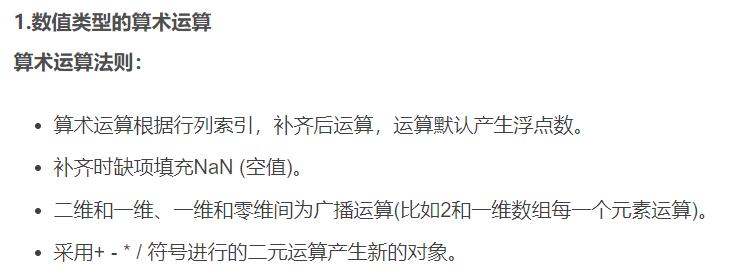

In [111]:
a = pd.DataFrame(np.arange(12).reshape(3,4))
b = pd.DataFrame(np.arange(20).reshape(4,5))

a

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [112]:
b

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [114]:
 # 结果的尺寸是大的DF的尺寸，若一方某位置没有元素，则在结果的相应位置填缺失值
a + b

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [115]:
a * b

,0,1,2,3,4
0,0.0,1.0,4.0,9.0,NaN
1,20.0,30.0,42.0,56.0,NaN
2,80.0,99.0,120.0,143.0,NaN
3,NaN,NaN,NaN,NaN,NaN


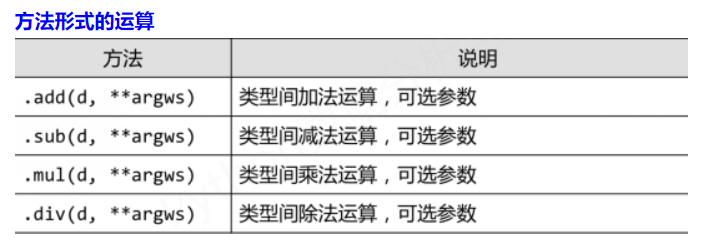

In [119]:
b.add(a, fill_value=100) # fill_value参数将缺失值的一方用100代替再进行运算

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,104.0
1,9.0,11.0,13.0,15.0,109.0
2,18.0,20.0,22.0,24.0,114.0
3,115.0,116.0,117.0,118.0,119.0


In [124]:
a.mul(b, fill_value=0)

,0,1,2,3,4
0,0.0,1.0,4.0,9.0,0.0
1,20.0,30.0,42.0,56.0,0.0
2,80.0,99.0,120.0,143.0,0.0
3,0.0,0.0,0.0,0.0,0.0


广播机制

In [126]:
c = pd.Series(range(4))
c

0    0
1    1
2    2
3    3
dtype: int64

In [127]:
c - 10

0   -10
1    -9
2    -8
3    -7
dtype: int64

In [132]:
b

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [129]:
# DataFrame - Series 默认在axis=1进行计算
b - c

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,5.0,5.0,5.0,5.0,NaN
2,10.0,10.0,10.0,10.0,NaN
3,15.0,15.0,15.0,15.0,NaN


In [133]:
b.sub(c, axis=0) # 使得在轴0计算

,0,1,2,3,4
0,0,1,2,3,4
1,4,5,6,7,8
2,8,9,10,11,12
3,12,13,14,15,16


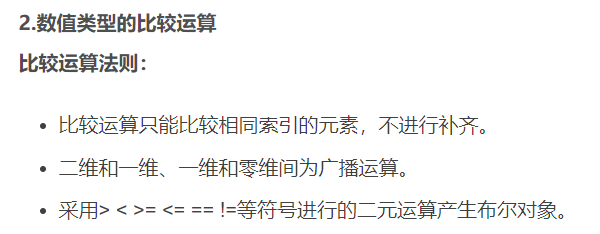

In [134]:
a = pd.DataFrame(np.arange(12).reshape(3,4))
a

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [137]:
d = pd.DataFrame(np.arange(12,0,-1).reshape(3,4))
d

,0,1,2,3
0,12,11,10,9
1,8,7,6,5
2,4,3,2,1


In [138]:
a > d # 同维运算，尺寸要一致

,0,1,2,3
0,False,False,False,False
1,False,False,False,True
2,True,True,True,True


In [139]:
a == d

,0,1,2,3
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False


不同维度，默认在axis=1上进行广播运算

In [140]:
c = pd.Series(np.arange(4))
c

0    0
1    1
2    2
3    3
dtype: int32

In [141]:
a

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [142]:
a > c

,0,1,2,3
0,False,False,False,False
1,True,True,True,True
2,True,True,True,True


In [143]:
c > 0

0    False
1     True
2     True
3     True
dtype: bool

In [1]:
#  df保存乘csv文件, index=True 是将行索引也保存，False则是不保存行索引
d.to_csv('submission.csv', index=False)

NameError: name 'd' is not defined